In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [6]:
# Load dataset from Excel file
data = pd.read_excel(r'D:\books for study\Kaggle works\module 4 coursera bi.xlsx')

# View basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())


         id  member_id        term      purpose  loan_status  loan_amnt  \
0  62286683   66483442   36 months  credit_card   Fully Paid      24000   
1  46314315   49422035   36 months  credit_card   Fully Paid       8000   
2  51317198   54726945   36 months  credit_card   Fully Paid      12175   
3  42984750   45981489   36 months  credit_card  Charged Off       6400   
4  42181434   45138158   36 months  credit_card   Fully Paid      12600   

   int_rate  installment home_ownership  annual_inc verification_status  \
0      7.89       750.86       MORTGAGE    237500.0     Source Verified   
1      6.68       245.85           RENT     41000.0        Not Verified   
2      9.17       388.13       MORTGAGE    100000.0        Not Verified   
3      6.92       197.38           RENT     41900.0     Source Verified   
4      6.68       387.22            OWN     73800.0        Not Verified   

   revol_bal  revol_util  total_acc  acc_open_past_24mths   total_pymnt  
0      28279        36.9

C:\Users\hp\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (you can also choose to fill missing data)
data = data.dropna()

# Convert categorical variables (like loan grades) into numeric form using LabelEncoder or pd.get_dummies
label_encoder = LabelEncoder()
data['loan_grade_encoded'] = label_encoder.fit_transform(data['loan_status'])

# Check for proper encoding
print(data['loan_grade_encoded'].head())


id                      0
member_id               0
term                    0
purpose                 0
loan_status             0
loan_amnt               0
int_rate                0
installment             0
home_ownership          0
annual_inc              0
verification_status     0
revol_bal               0
revol_util              0
total_acc               0
acc_open_past_24mths    0
total_pymnt             0
dtype: int64
0    1
1    1
2    1
3    0
4    1
Name: loan_grade_encoded, dtype: int32


In [10]:
print(data.dtypes)


id                        int64
member_id                 int64
term                     object
purpose                  object
loan_status              object
loan_amnt                 int64
int_rate                float64
installment             float64
home_ownership           object
annual_inc              float64
verification_status      object
revol_bal                 int64
revol_util              float64
total_acc                 int64
acc_open_past_24mths      int64
total_pymnt             float64
loan_grade_encoded        int32
dtype: object


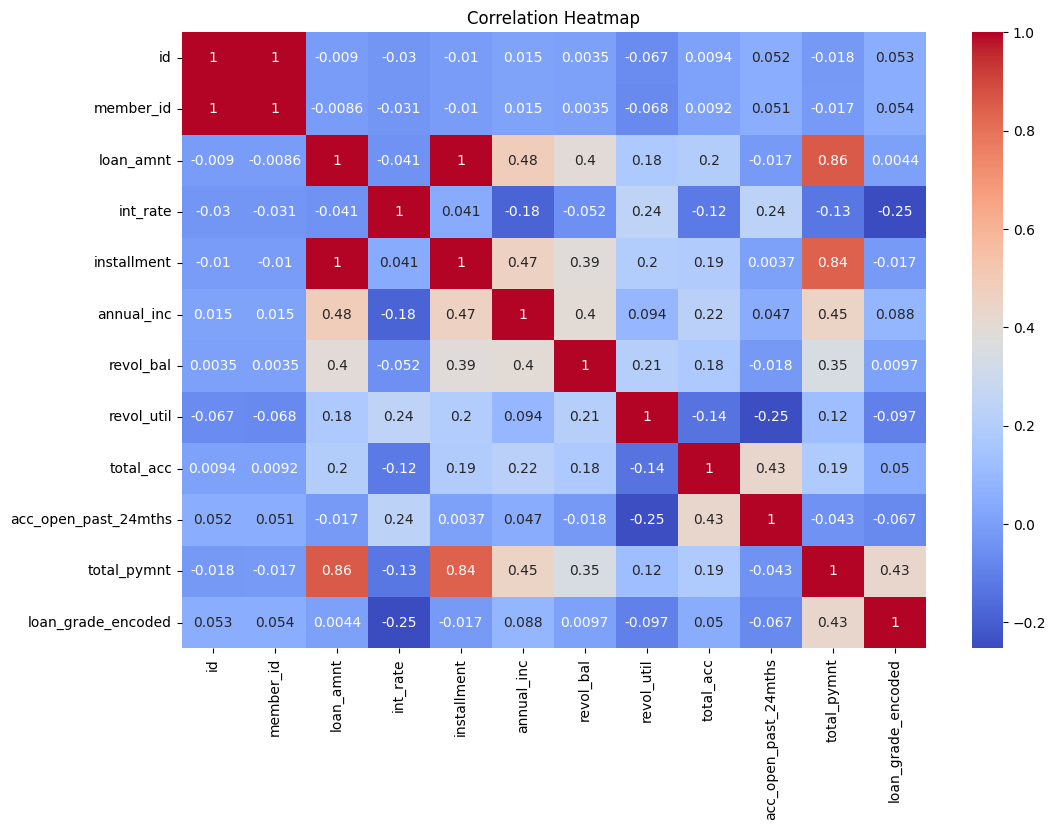

In [12]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


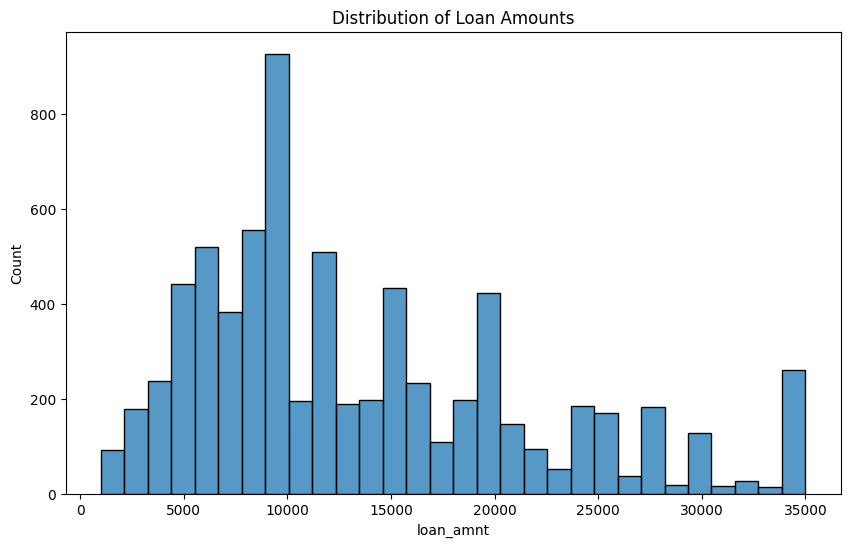

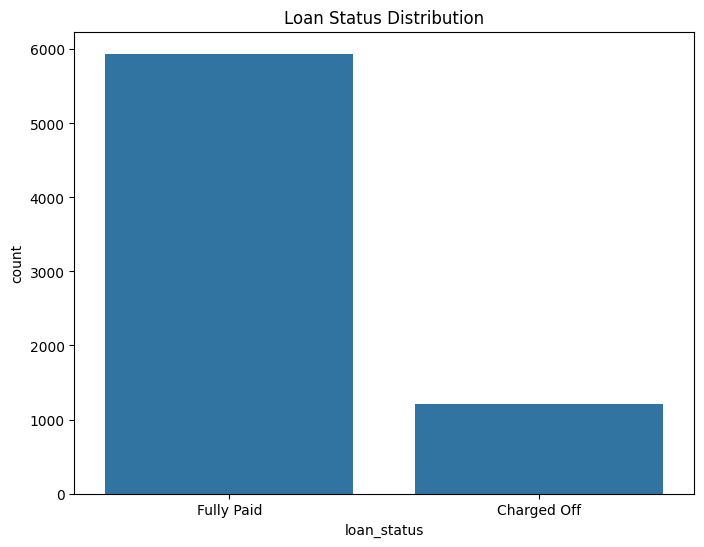

In [13]:
# Visualize the distribution of loan amounts
plt.figure(figsize=(10,6))
sns.histplot(data['loan_amnt'], bins=30, kde=False)
plt.title('Distribution of Loan Amounts')
plt.show()


# Visualize default status (assuming 'loan_status' indicates default)
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()


In [20]:
# Print the column names to investigate
print(data.columns)

# Example output:
# Index(['loan_amnt', 'int_rate', 'FICO Range Low', 'FICO Range High', 'dti ', 'loan_grade', 'annual_inc', 'loan_status'], dtype='object')

# Notice the space in 'dti ' or 'FICO Range Low', update the feature list:
features = ['FICO Range Low', 'FICO Range High', 'loan_amnt', 'int_rate', 'dti ', 'loan_grade_encoded', 'annual_inc']


X = data[features]
y = data[target]

Index(['id', 'member_id', 'term', 'purpose', 'loan_status', 'loan_amnt',
       'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'revol_bal', 'revol_util', 'total_acc',
       'acc_open_past_24mths', 'total_pymnt', 'loan_grade_encoded'],
      dtype='object')


KeyError: "['FICO Range Low', 'FICO Range High', 'dti '] not in index"

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'X' is not defined